# Monte Carlo Method
### Why?
Recall from the previous Notebook we ended with asking why we bother running simulations that approach the mean.

What we want to do is advise on *all* outcomes as well as their likelihood. Calculating this when analyzing multiple names with varying degrees of certainty would quickly become complicated. Additionally we would only be able to provide a single-point estimate along with a confidence interval.

### Implementation

In [3]:
import numpy as np
from scipy import stats
with open('data/beta_params.npy', "rb") as fp:
    beta_params = np.load(fp)

def make_beta_distribution(count, prior):
    if prior:
        a, b = get_beta_params(*prior)
    else:
        a, b= 1, 1
        
    n_male, n_female = count
    a += n_female
    b += n_male
    return stats.beta(a, b)
        
def get_beta_params(x, y):
    ci_array = np.asarray(beta_params[:, 2:])
    val_array = np.array([x, y]).reshape(1, 2)
    idx_2d = np.abs(ci_array - val_array)
    # sum the differences
    idx = idx_2d.sum(axis=1)
    alpha, beta, ci_95_min, ci_95_max = beta_params[idx.argmin()]
    return alpha, beta
        

def make_name_simulation(prob_interval, n_trials):
    
    prob_min, prob_max = prob_interval
    min_result = np.random.binomial(1, prob_min, size=n_trials // 2)
    max_result = np.random.binomial(1, prob_max, size=n_trials // 2)
    results = np.concatenate([min_result, max_result])
    np.random.shuffle(results)
    return results

def simulate(count, prior, n_trials):
    beta_dist = make_beta_distribution(count, prior)
    prob_int = beta_dist.interval(0.95)
    result = make_name_simulation(prob_int, n_trials)
    return result

def simulate_many(counts, prior=None, n_trials=50000):
    outcomes = []
    for count in counts:
        outcomes.append(simulate(count, prior, n_trials))
        
    # make large array where each column represents 1 trial and 1 row represents one name_count
    return np.vstack(outcomes)



Below we run several potential scenarios

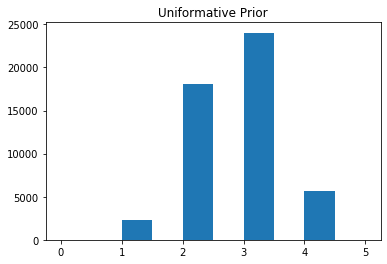

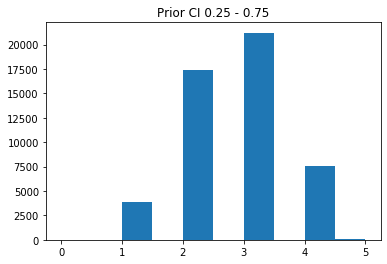

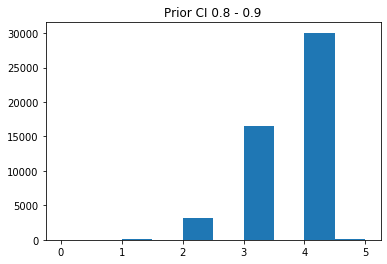

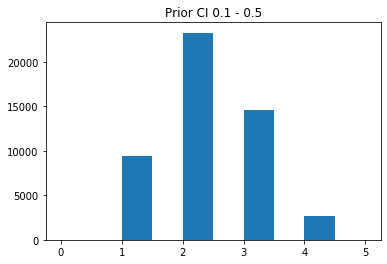

In [21]:
import matplotlib.pyplot as plt
plt.ion()
from itertools import product

name_counts = [(5, 0),
               (700000, 4000),
               (1200, 480000),
               (1, 18),
               (1, 2)]

priors = [None, (0.25, 0.75), (0.8, 0.9), (0.1, 0.5)]

for x, y in product([name_counts], priors):
    r = simulate_many(counts=x, prior=y)
    plt.figure()
    plt.hist(r.sum(axis=0))
    if not y:
        plt.title("Uniformative Prior")
    else:
        plt.title("Prior CI {} - {}".format(*y))
    plt.show()